## Granger Causality

## 1. Stationarity

- Before applying Granger Causality test, it is necessary to test for stationary. \
- Augmented Dickey-Fuller or Phillips-Perron are tests for stationary. \
- Null hypothesis: time series has at least one unit root (i.e. non-stationary).
- Alternative hypothesis: time series does not have unit roots. d. 

## 2. GC for non-stationary series (Toda & Yamamoto 1995)
- Check to see wheter the two series are cointegrate.
- Apply GC for both directions

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import statsmodels

In [2]:
aapl = yf.Ticker("AAPL")

In [30]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() 

## AAPL data from 2021 to 2023
data_aapl_2023 = pdr.get_data_yahoo("AAPL", start="2023-01-01", end="2023-12-31")
data_aapl_2022 = pdr.get_data_yahoo("AAPL", start="2022-01-01", end="2022-12-31")
data_aapl_2021 = pdr.get_data_yahoo("AAPL", start="2021-01-01", end="2021-12-31")

## GOOG data from 2021 to 2023
## AAPL data from 2021 to 2023
data_goog_2023 = pdr.get_data_yahoo("GOOG", start="2023-01-01", end="2023-12-31")
data_goog_2022 = pdr.get_data_yahoo("GOOG", start="2022-01-01", end="2022-12-31")
data_goog_2021 = pdr.get_data_yahoo("GOOG", start="2021-01-01", end="2021-12-31")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


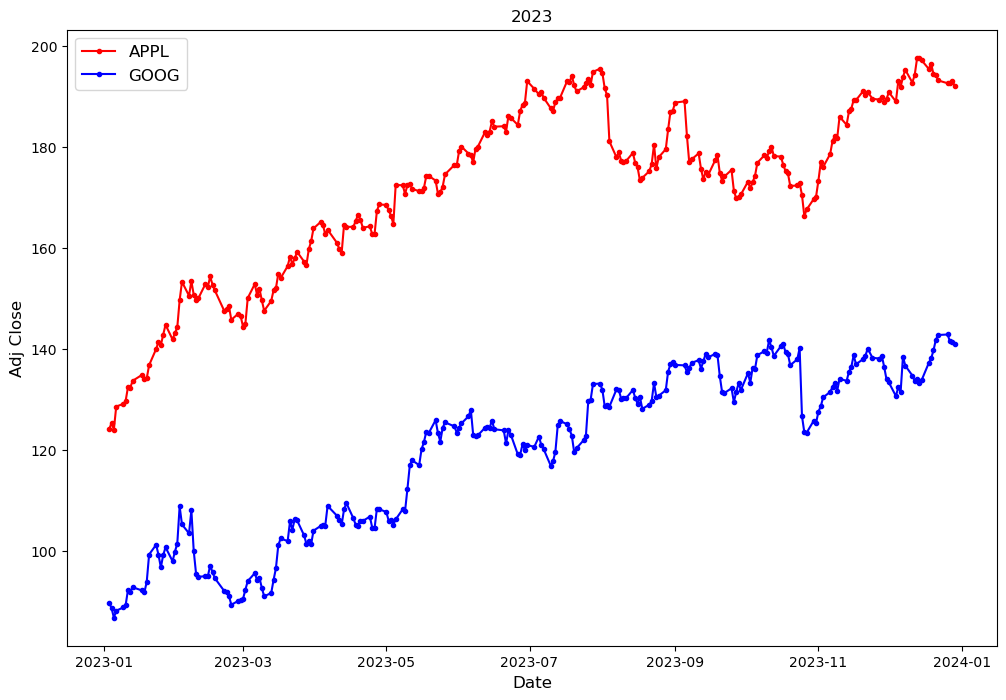

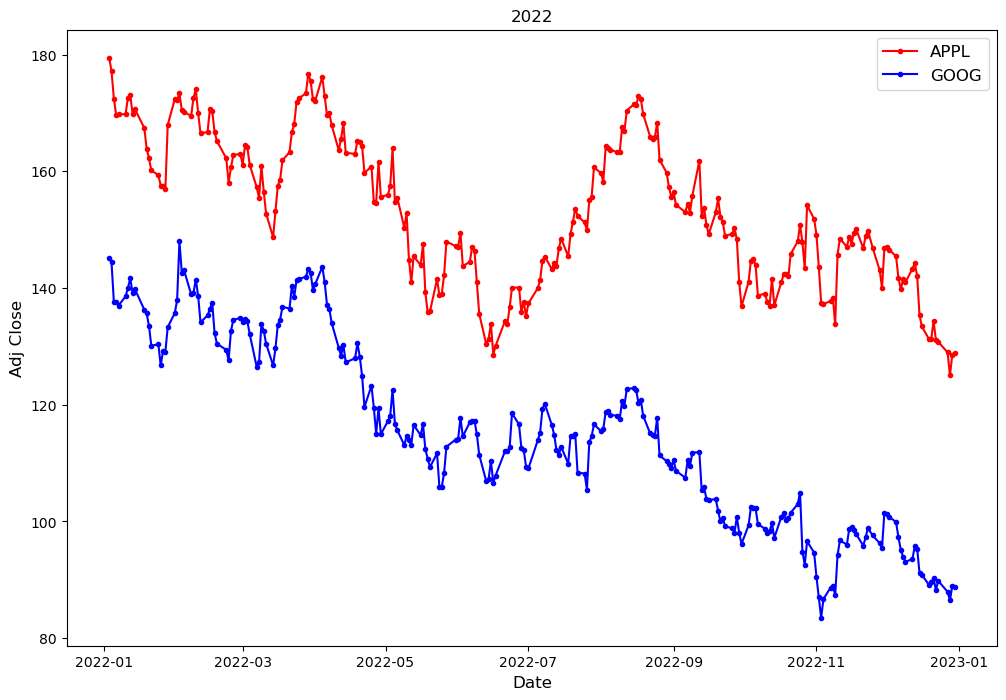

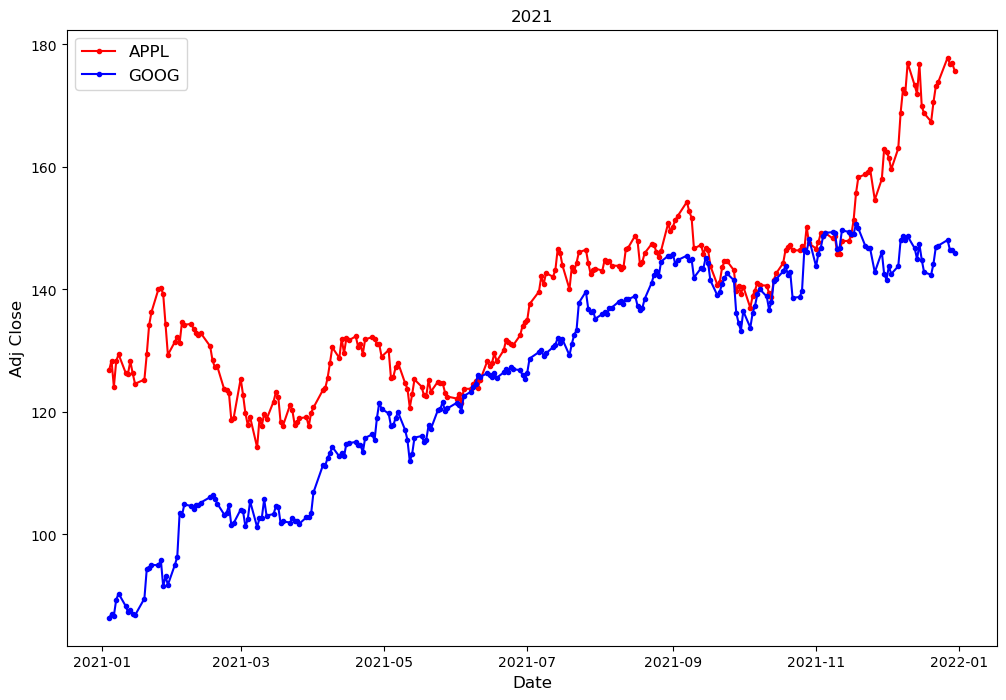

In [32]:
# Plot APPL and ITW
# Plot Adj Close
# Plot the main line with markers

# 2023
plt.figure(figsize=(12,8))
plt.plot(data_aapl_2023['Adj Close'],'.-',color='red',label='APPL')
plt.plot(data_goog_2023['Adj Close'],'.-',color='blue',label='GOOG')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('2023')

plt.legend(fontsize=12)
plt.show()

# 2022
plt.figure(figsize=(12,8))
plt.plot(data_aapl_2022['Adj Close'],'.-',color='red',label='APPL')
plt.plot(data_goog_2022['Adj Close'],'.-',color='blue',label='GOOG')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('2022')

plt.legend(fontsize=12)
plt.show()

#2021
plt.figure(figsize=(12,8))
plt.plot(data_aapl_2021['Adj Close'],'.-',color='red',label='APPL')
plt.plot(data_goog_2021['Adj Close'],'.-',color='blue',label='GOOG')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('2021')

plt.legend(fontsize=12)
plt.show()

## GC for 2023

First, test for stationary

In [38]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

#adf_aapl_2023 = adfuller(data_aapl_2023['Adj Close'][1:].values)
adf_aapl_2023 = adfuller(data_aapl_2023['Adj Close'].values)
print("ADF test for AAPL Adj Close:")
print()
print("ADF Statistics:", adf_aapl_2023[0])
print("p-value:", adf_aapl_2023[1])

#kpss_aapl_2023 = kpss(data_aapl_2023['Adj Close'][1:].values)
kpss_aapl_2023 = kpss(data_aapl_2023['Adj Close'].values)
print("KPSS test for AAPL Adj Close:")
print()
print("KPSS Statistics:", kpss_aapl_2023[0])
print("p-value:", kpss_aapl_2023[1])

ADF test for AAPL Adj Close:

ADF Statistics: -2.586122219081991
p-value: 0.09589957890299966
KPSS test for AAPL Adj Close:

KPSS Statistics: 1.7159526371757898
p-value: 0.01


C:\Users\teres\AppData\Local\Temp\ipykernel_31784\3369308524.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_aapl_2023 = kpss(data_aapl_2023['Adj Close'].values)


Both KPSS and ADF tests determine that AAPL's Adj Close is non-stationary

In [46]:
# Difference stationary
data_aapl_2023['Adj Close Diff'] = data_aapl_2023['Adj Close'].diff()
data_aapl_2023
adf_aapl_diff_2023 = adfuller(data_aapl_2023['Adj Close Diff'][1:])
print("ADF test for 2023 AAPL Adj Close:")
print()
print("ADF Statistics:", adf_aapl_diff_2023[0])
print("p-value:", adf_aapl_diff_2023[1])

kpss_aapl_diff_2023 = kpss(data_aapl_2023['Adj Close Diff'][1:])
print("KPSS test for 2023 AAPL Adj Close:")
print()
print("KPSS Statistics:", kpss_aapl_diff_2023[0])
print("p-value:", kpss_aapl_diff_2023[1])

ADF test for AAPL Adj Close:

ADF Statistics: -14.748740069047743
p-value: 2.504250252846757e-27
KPSS test for AAPL Adj Close:

KPSS Statistics: 0.25606624377850384
p-value: 0.1


C:\Users\teres\AppData\Local\Temp\ipykernel_31784\980980635.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_aapl_diff_2023 = kpss(data_aapl_2023['Adj Close Diff'][1:])


ADF rejects the Null hypothesis while KPSS fails to reject the Null hypothesis. This means both tests determine that the AAPL's Adj Close Diff is stationary.

In [47]:
# Difference stationary
data_goog_2023['Adj Close Diff'] = data_goog_2023['Adj Close'].diff()
adf_goog_diff_2023 = adfuller(data_goog_2023['Adj Close Diff'][1:])
print("ADF test for 2023 GOOG Adj Close:")
print()
print("ADF Statistics:", adf_goog_diff_2023[0])
print("p-value:", adf_goog_diff_2023[1])

kpss_goog_diff_2023 = kpss(data_goog_2023['Adj Close Diff'][1:])
print("KPSS test for 2023 GOOG Adj Close:")
print()
print("KPSS Statistics:", kpss_goog_diff_2023[0])
print("p-value:", kpss_goog_diff_2023[1])

ADF test for 2023 GOOG Adj Close:

ADF Statistics: -15.280801766756841
p-value: 4.580754480313806e-28
KPSS test for 2023 GOOG Adj Close:

KPSS Statistics: 0.04504174157036703
p-value: 0.1


C:\Users\teres\AppData\Local\Temp\ipykernel_31784\798631877.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_goog_diff_2023 = kpss(data_goog_2023['Adj Close Diff'][1:])


ADF rejects the Null hypothesis while KPSS fails to reject the Null hypothesis. This means both tests determine that the GOOG's Adj Close Diff is stationary.

In [48]:
from statsmodels.tsa.stattools import acf, pacf, grangercausalitytests

In [50]:
data_aapl_2023['GOOG Adj Close Diff'] = data_goog_2023['Adj Close Diff'].copy()
data_aapl_2023

,Open,High,Low,Close,Adj Close,Volume,Adj Close Diff,GOOG Adj Close Diff
Date,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600,1.279465,-0.989998
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998444,80962700,-1.329063,-1.940002
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,4.562424,1.390007
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800,0.525665,0.639999
...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,-1.077133,0.919998
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300,-0.548569,0.100006
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,0.099731,-1.380005


In [57]:
data_aapl_2023['Adj Close Prev'] = data_aapl_2023['Adj Close'].shift(periods=1)
data_aapl_2023['Daily Return'] = (data_aapl_2023['Adj Close'] - data_aapl_2023['Adj Close Prev'])/data_aapl_2023['Adj Close Prev']
data_aapl_2023

,Open,High,Low,Close,Adj Close,Volume,Adj Close Diff,GOOG Adj Close Diff,Adj Close Prev,Daily Return
Date,,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,NaN,NaN,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600,1.279465,-0.989998,124.048042,0.010314
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998444,80962700,-1.329063,-1.940002,125.327507,-0.010605
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,4.562424,1.390007,123.998444,0.036794
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800,0.525665,0.639999,128.560867,0.004089
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,-1.077133,0.919998,194.168518,-0.005547
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300,-0.548569,0.100006,193.091385,-0.002841
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,0.099731,-1.380005,192.542816,0.000518


In [65]:
data_goog_2023['Adj Close Prev'] = data_goog_2023['Adj Close'].shift(periods=1)
data_goog_2023['Daily Return'] = (data_goog_2023['Adj Close'] - data_goog_2023['Adj Close Prev'])/data_goog_2023['Adj Close Prev']

data_aapl_2023['GOOG Daily Return'] = data_goog_2023['Daily Return'].copy()
#data_aapl_2023

In [74]:
## Null hypothesis: GOOG does not GC AAPL
AAPL_GC_GOOG = grangercausalitytests(data_aapl_2023[['Adj Close Diff', 'GOOG Adj Close Diff']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0494  , p=0.8243  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.0500  , p=0.8231  , df=1
likelihood ratio test: chi2=0.0500  , p=0.8231  , df=1
parameter F test:         F=0.0494  , p=0.8243  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0661  , p=0.9360  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=0.1350  , p=0.9347  , df=2
likelihood ratio test: chi2=0.1349  , p=0.9348  , df=2
parameter F test:         F=0.0661  , p=0.9360  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3432  , p=0.7941  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=1.0599  , p=0.7868  , df=3
likelihood ratio test: chi2=1.0576  , p=0.7873  , df=3
parameter F test:         F=0.3432  , p=0.7941  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4760  , p=0.7533  

The null hypothesis is rejected. Therefore, GOOG does not GC AAPL

In [73]:
## Null hypothesis: APPL does not GC GOOG (second column GC first column)
GOOG_GC_AAPL = grangercausalitytests(data_aapl_2023[['GOOG Adj Close Diff', 'Adj Close Diff']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2140  , p=0.0742  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=3.2534  , p=0.0713  , df=1
likelihood ratio test: chi2=3.2322  , p=0.0722  , df=1
parameter F test:         F=3.2140  , p=0.0742  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5734  , p=0.2095  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=3.2118  , p=0.2007  , df=2
likelihood ratio test: chi2=3.1911  , p=0.2028  , df=2
parameter F test:         F=1.5734  , p=0.2095  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1940  , p=0.3127  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=3.6869  , p=0.2973  , df=3
likelihood ratio test: chi2=3.6596  , p=0.3006  , df=3
parameter F test:         F=1.1940  , p=0.3127  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9301  , p=0.4471  

In [72]:
## Null hypothesis: GOOG does not GC AAPL
AAPL_GC_GOOG = grangercausalitytests(data_aapl_2023[['Daily Return', 'GOOG Daily Return']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1643  , p=0.6856  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.1663  , p=0.6834  , df=1
likelihood ratio test: chi2=0.1663  , p=0.6835  , df=1
parameter F test:         F=0.1643  , p=0.6856  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1647  , p=0.8482  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=0.3363  , p=0.8452  , df=2
likelihood ratio test: chi2=0.3361  , p=0.8453  , df=2
parameter F test:         F=0.1647  , p=0.8482  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3709  , p=0.7741  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=1.1454  , p=0.7661  , df=3
likelihood ratio test: chi2=1.1427  , p=0.7668  , df=3
parameter F test:         F=0.3709  , p=0.7741  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5044  , p=0.7326  

In [71]:
## Null hypothesis: GOOG does not GC AAPL
AAPL_GC_GOOG = grangercausalitytests(data_aapl_2023[['GOOG Daily Return', 'Daily Return']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5812  , p=0.0596  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=3.6251  , p=0.0569  , df=1
likelihood ratio test: chi2=3.5988  , p=0.0578  , df=1
parameter F test:         F=3.5812  , p=0.0596  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6867  , p=0.1873  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=3.4432  , p=0.1788  , df=2
likelihood ratio test: chi2=3.4194  , p=0.1809  , df=2
parameter F test:         F=1.6867  , p=0.1873  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3540  , p=0.2576  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=4.1809  , p=0.2426  , df=3
likelihood ratio test: chi2=4.1458  , p=0.2461  , df=3
parameter F test:         F=1.3540  , p=0.2576  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1243  , p=0.3457  

The null hypothesis is rejected. Therefore, AAPL does not GC APPL

## TSLA

In [56]:
## TSLA data from 2021 to 2023
data_tsla_2023 = pdr.get_data_yahoo("TSLA", start="2023-01-01", end="2023-12-31")
data_tsla_2022 = pdr.get_data_yahoo("TSLA", start="2022-01-01", end="2022-12-31")
data_tsla_2021 = pdr.get_data_yahoo("TSLA", start="2021-01-01", end="2021-12-31")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [66]:
data_tsla_2023['Adj Close Diff'] = data_tsla_2023['Adj Close'].diff()
data_tsla_2023['Adj Close Prev'] = data_tsla_2023['Adj Close'].shift(periods=1)
data_tsla_2023['Daily Return'] = (data_tsla_2023['Adj Close'] - data_tsla_2023['Adj Close Prev'])/data_tsla_2023['Adj Close Prev']
data_aapl_2023['TSLA Adj Close Diff'] = data_tsla_2023['Adj Close Diff'].copy()
data_aapl_2023['TSLA Daily Return'] = data_tsla_2023['Daily Return'].copy()
data_aapl_2023

,Open,High,Low,Close,Adj Close,Volume,Adj Close Diff,GOOG Adj Close Diff,Adj Close Prev,Daily Return,GOOG Daily Return,TSLA Adj Close Diff,TSLA Daily Return
Date,,,,,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600,1.279465,-0.989998,124.048042,0.010314,-0.011037,5.540001,0.051249
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998444,80962700,-1.329063,-1.940002,125.327507,-0.010605,-0.021869,-3.300003,-0.029039
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,4.562424,1.390007,123.998444,0.036794,0.016019,2.720001,0.024651
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800,0.525665,0.639999,128.560867,0.004089,0.007260,6.709999,0.059349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,-1.077133,0.919998,194.168518,-0.005547,0.006488,-1.960007,-0.007701
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300,-0.548569,0.100006,193.091385,-0.002841,0.000701,4.069992,0.016116
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,0.099731,-1.380005,192.542816,0.000518,-0.009663,4.830017,0.018822


In [67]:
grangercausalitytests(data_aapl_2023[['TSLA Daily Return', 'Daily Return']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7601  , p=0.0979  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=2.7939  , p=0.0946  , df=1
likelihood ratio test: chi2=2.7783  , p=0.0955  , df=1
parameter F test:         F=2.7601  , p=0.0979  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4005  , p=0.2485  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=2.8588  , p=0.2395  , df=2
likelihood ratio test: chi2=2.8424  , p=0.2414  , df=2
parameter F test:         F=1.4005  , p=0.2485  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9837  , p=0.4011  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=3.0374  , p=0.3859  , df=3
likelihood ratio test: chi2=3.0188  , p=0.3887  , df=3
parameter F test:         F=0.9837  , p=0.4011  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4767  , p=0.7528  

{1: ({'ssr_ftest': (2.7601378583753813, 0.09791895239261243, 245.0, 1),
   'ssr_chi2test': (2.7939354648044676, 0.09462158821992729, 1),
   'lrtest': (2.778314621692516, 0.09554866817541631, 1),
   'params_ftest': (2.760137858375402, 0.09791895239260849, 245.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.400452761091737, 0.24847567044719104, 242.0, 2),
   'ssr_chi2test': (2.8587754709889177, 0.23945548746646694, 2),
   'lrtest': (2.842358305283142, 0.24142916714917853, 2),
   'params_ftest': (1.4004527610917317, 0.2484756704471935, 242.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.9836702226878108, 0.401116732008967, 239.0, 3),
   'ssr_chi2test': (3.037441942860269, 0.3858883137568338, 3),
   'lrtest': (3.0188427452083033, 0.3887291096015536, 3),
   'params_ftest': (0.9836702226878057, 0.401116732008967, 239.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [68]:
grangercausalitytests(data_aapl_2023[['Daily Return', 'TSLA Daily Return']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7820  , p=0.3774  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.7916  , p=0.3736  , df=1
likelihood ratio test: chi2=0.7903  , p=0.3740  , df=1
parameter F test:         F=0.7820  , p=0.3774  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8444  , p=0.1603  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=3.7651  , p=0.1522  , df=2
likelihood ratio test: chi2=3.7367  , p=0.1544  , df=2
parameter F test:         F=1.8444  , p=0.1603  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8930  , p=0.4454  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=2.7575  , p=0.4305  , df=3
likelihood ratio test: chi2=2.7422  , p=0.4331  , df=3
parameter F test:         F=0.8930  , p=0.4454  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8828  , p=0.4749  

{1: ({'ssr_ftest': (0.7820021179336747, 0.37739650450270745, 245.0, 1),
   'ssr_chi2test': (0.7915776540716379, 0.3736235035169697, 1),
   'lrtest': (0.7903170390795822, 0.37400427706665285, 1),
   'params_ftest': (0.7820021179336636, 0.37739650450270745, 245.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.8444335002831638, 0.16033062975959958, 242.0, 2),
   'ssr_chi2test': (3.765083260908607, 0.15220277053707384, 2),
   'lrtest': (3.736675524739894, 0.1543800650079623, 2),
   'params_ftest': (1.8444335002831393, 0.16033062975960327, 242.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.8930159991317079, 0.44540058920595016, 239.0, 3),
   'ssr_chi2test': (2.7575138383230144, 0.43054173307974986, 3),
   'lrtest': (2.742173324696978, 0.433107889732642, 3),
   'params_ftest': (0.8930159991317107, 0.4454005892059454, 239.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

In [70]:
grangercausalitytests(data_aapl_2023[['Adj Close Diff', 'TSLA Adj Close Diff']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7242  , p=0.3956  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.7330  , p=0.3919  , df=1
likelihood ratio test: chi2=0.7319  , p=0.3923  , df=1
parameter F test:         F=0.7242  , p=0.3956  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0305  , p=0.1335  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=4.1449  , p=0.1259  , df=2
likelihood ratio test: chi2=4.1105  , p=0.1281  , df=2
parameter F test:         F=2.0305  , p=0.1335  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2413  , p=0.2954  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=3.8329  , p=0.2801  , df=3
likelihood ratio test: chi2=3.8033  , p=0.2835  , df=3
parameter F test:         F=1.2413  , p=0.2954  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9675  , p=0.4260  

{1: ({'ssr_ftest': (0.7241558694634516, 0.39561501456414494, 245.0, 1),
   'ssr_chi2test': (0.7330230841915755, 0.39190504090036293, 1),
   'lrtest': (0.7319419019474935, 0.39225446579503265, 1),
   'params_ftest': (0.7241558694633854, 0.3956150145641718, 245.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.0305023234083115, 0.13350002504233274, 242.0, 2),
   'ssr_chi2test': (4.144909701502917, 0.1258763943492597, 2),
   'lrtest': (4.1105160541242185, 0.12805978842320412, 2),
   'params_ftest': (2.0305023234083492, 0.1335000250423301, 242.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.2412695653910102, 0.2953959292528157, 239.0, 3),
   'ssr_chi2test': (3.8328742228391866, 0.2800853937666312, 3),
   'lrtest': (3.803321197257219, 0.2835000560822473, 3),
   'params_ftest': (1.2412695653910133, 0.29539592925280916, 239.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

## Microsoft MSFT

In [75]:
data_msft_2023 = pdr.get_data_yahoo("MSFT", start="2023-01-01", end="2023-12-31")

data_msft_2023['Adj Close Diff'] = data_msft_2023['Adj Close'].diff()
data_msft_2023['Adj Close Prev'] = data_msft_2023['Adj Close'].shift(periods=1)
data_msft_2023['Daily Return'] = (data_msft_2023['Adj Close'] - data_msft_2023['Adj Close Prev'])/data_msft_2023['Adj Close Prev']
data_aapl_2023['MSFT Adj Close Diff'] = data_msft_2023['Adj Close Diff'].copy()
data_aapl_2023['MSFT Daily Return'] = data_msft_2023['Daily Return'].copy()
data_aapl_2023

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Adj Close Diff,GOOG Adj Close Diff,Adj Close Prev,Daily Return,GOOG Daily Return,TSLA Adj Close Diff,TSLA Daily Return,MSFT Adj Close Diff,MSFT Daily Return
Date,,,,,,,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600,1.279465,-0.989998,124.048042,0.010314,-0.011037,5.540001,0.051249,-10.350052,-0.043743
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998444,80962700,-1.329063,-1.940002,125.327507,-0.010605,-0.021869,-3.300003,-0.029039,-6.705826,-0.029638
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,4.562424,1.390007,123.998444,0.036794,0.016019,2.720001,0.024651,2.587509,0.011785
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800,0.525665,0.639999,128.560867,0.004089,0.007260,6.709999,0.059349,2.162842,0.009736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,-1.077133,0.919998,194.168518,-0.005547,0.006488,-1.960007,-0.007701,1.036163,0.002784
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300,-0.548569,0.100006,193.091385,-0.002841,0.000701,4.069992,0.016116,0.079742,0.000214
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,0.099731,-1.380005,192.542816,0.000518,-0.009663,4.830017,0.018822,-0.587860,-0.001575


In [76]:
grangercausalitytests(data_aapl_2023[['Adj Close Diff', 'MSFT Adj Close Diff']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3013  , p=0.5835  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.3050  , p=0.5808  , df=1
likelihood ratio test: chi2=0.3048  , p=0.5809  , df=1
parameter F test:         F=0.3013  , p=0.5835  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2040  , p=0.8156  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=0.4163  , p=0.8121  , df=2
likelihood ratio test: chi2=0.4160  , p=0.8122  , df=2
parameter F test:         F=0.2040  , p=0.8156  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1113  , p=0.9534  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=0.3438  , p=0.9516  , df=3
likelihood ratio test: chi2=0.3436  , p=0.9516  , df=3
parameter F test:         F=0.1113  , p=0.9534  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1568  , p=0.9598  

{1: ({'ssr_ftest': (0.30133187298631686, 0.5835485812659007, 245.0, 1),
   'ssr_chi2test': (0.30502165102288403, 0.5807512889564314, 1),
   'lrtest': (0.30483422765382784, 0.5808675464464406, 1),
   'params_ftest': (0.3013318729863008, 0.5835485812659007, 245.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.2039570832163676, 0.8156374032462416, 242.0, 2),
   'ssr_chi2test': (0.4163421450780397, 0.8120681022762312, 2),
   'lrtest': (0.41599164661784016, 0.8122104290569088, 2),
   'params_ftest': (0.2039570832163874, 0.8156374032462306, 242.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.11134411094768581, 0.9534153270035507, 239.0, 3),
   'ssr_chi2test': (0.34381570660833527, 0.9515878463356666, 3),
   'lrtest': (0.3435756675553421, 0.95163512295769, 3),
   'params_ftest': (0.11134411094768787, 0.9534153270035507, 239.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

In [77]:
grangercausalitytests(data_aapl_2023[['Adj Close Diff', 'MSFT Daily Return']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8123  , p=0.3683  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.8223  , p=0.3645  , df=1
likelihood ratio test: chi2=0.8209  , p=0.3649  , df=1
parameter F test:         F=0.8123  , p=0.3683  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4665  , p=0.6278  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=0.9522  , p=0.6212  , df=2
likelihood ratio test: chi2=0.9504  , p=0.6218  , df=2
parameter F test:         F=0.4665  , p=0.6278  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3312  , p=0.8028  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=1.0226  , p=0.7958  , df=3
likelihood ratio test: chi2=1.0205  , p=0.7963  , df=3
parameter F test:         F=0.3312  , p=0.8028  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2918  , p=0.8831  

{1: ({'ssr_ftest': (0.8123311889695642, 0.3683170694072071, 245.0, 1),
   'ssr_chi2test': (0.822278101487559, 0.3645149433993067, 1),
   'lrtest': (0.8209179191824205, 0.3649119244912229, 1),
   'params_ftest': (0.8123311889695194, 0.3683170694072152, 245.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.4664809907341945, 0.6277683167747604, 242.0, 2),
   'ssr_chi2test': (0.9522380554656698, 0.6211895390644088, 2),
   'lrtest': (0.9504072183485732, 0.6217584478519469, 2),
   'params_ftest': (0.46648099073421334, 0.627768316774752, 242.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.3311792343332138, 0.8028130966271454, 239.0, 3),
   'ssr_chi2test': (1.02263713363143, 0.7957746645629504, 3),
   'lrtest': (1.0205174233733487, 0.7962875134925952, 3),
   'params_ftest': (0.33117923433319923, 0.8028130966271583, 239.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

## Amazon AMZN

In [80]:
data_amzn_2023 = pdr.get_data_yahoo("AMZN", start="2023-01-01", end="2023-12-31")

data_amzn_2023['Adj Close Diff'] = data_amzn_2023['Adj Close'].diff()
data_amzn_2023['Adj Close Prev'] = data_amzn_2023['Adj Close'].shift(periods=1)
data_amzn_2023['Daily Return'] = (data_amzn_2023['Adj Close'] - data_amzn_2023['Adj Close Prev'])/data_amzn_2023['Adj Close Prev']
data_aapl_2023['AMZN Adj Close Diff'] = data_amzn_2023['Adj Close Diff'].copy()
data_aapl_2023['AMZN Daily Return'] = data_amzn_2023['Daily Return'].copy()
#data_aapl_2023

[*********************100%%**********************]  1 of 1 completed


In [81]:
grangercausalitytests(data_aapl_2023[['Adj Close Diff', 'AMZN Adj Close Diff']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3735  , p=0.5417  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.3781  , p=0.5386  , df=1
likelihood ratio test: chi2=0.3778  , p=0.5388  , df=1
parameter F test:         F=0.3735  , p=0.5417  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1889  , p=0.8280  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=0.3856  , p=0.8247  , df=2
likelihood ratio test: chi2=0.3853  , p=0.8248  , df=2
parameter F test:         F=0.1889  , p=0.8280  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7883  , p=0.5015  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=2.4341  , p=0.4873  , df=3
likelihood ratio test: chi2=2.4221  , p=0.4895  , df=3
parameter F test:         F=0.7883  , p=0.5015  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6383  , p=0.6357  

{1: ({'ssr_ftest': (0.37353520767347415, 0.5416501864057361, 245.0, 1),
   'ssr_chi2test': (0.37810910817559834, 0.5386169508969286, 1),
   'lrtest': (0.3778211619069225, 0.5387716264133181, 1),
   'params_ftest': (0.3735352076734091, 0.5416501864057803, 245.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.18887338345650131, 0.8280132461625138, 242.0, 2),
   'ssr_chi2test': (0.3855514521798002, 0.8246669046720271, 2),
   'lrtest': (0.38525085417495575, 0.8247908606001226, 2),
   'params_ftest': (0.1888733834565283, 0.8280132461624916, 242.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.7882667819810625, 0.5014842115597133, 239.0, 3),
   'ssr_chi2test': (2.434062280761607, 0.4873254374994601, 3),
   'lrtest': (2.422099139183274, 0.4895341329924183, 3),
   'params_ftest': (0.7882667819810606, 0.5014842115597133, 239.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.

In [83]:
grangercausalitytests(data_aapl_2023[['Daily Return', 'AMZN Daily Return']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9365  , p=0.3341  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.9479  , p=0.3302  , df=1
likelihood ratio test: chi2=0.9461  , p=0.3307  , df=1
parameter F test:         F=0.9365  , p=0.3341  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4683  , p=0.6266  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=0.9560  , p=0.6200  , df=2
likelihood ratio test: chi2=0.9542  , p=0.6206  , df=2
parameter F test:         F=0.4683  , p=0.6266  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2022  , p=0.3096  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=3.7123  , p=0.2943  , df=3
likelihood ratio test: chi2=3.6846  , p=0.2976  , df=3
parameter F test:         F=1.2022  , p=0.3096  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9037  , p=0.4625  

{1: ({'ssr_ftest': (0.9364785940289149, 0.3341394126197358, 245.0, 1),
   'ssr_chi2test': (0.9479456788537586, 0.3302427588788293, 1),
   'lrtest': (0.9461385867116405, 0.3307041383023945, 1),
   'params_ftest': (0.9364785940289516, 0.3341394126197287, 245.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.46832732886080825, 0.6266147654353567, 242.0, 2),
   'ssr_chi2test': (0.9560070266828069, 0.620020018636165, 2),
   'lrtest': (0.9541616866390541, 0.6205923565192235, 2),
   'params_ftest': (0.46832732886079675, 0.626614765435365, 242.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.2022202996784614, 0.3096293408992079, 239.0, 3),
   'ssr_chi2test': (3.712295318672404, 0.2942537937222712, 3),
   'lrtest': (3.6845635240392767, 0.29760186201121025, 3),
   'params_ftest': (1.2022202996784555, 0.3096293408992079, 239.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

## Samsung SSNLF

In [84]:
data_ssnlf_2023 = pdr.get_data_yahoo("SSNLF", start="2023-01-01", end="2023-12-31")

data_ssnlf_2023['Adj Close Diff'] = data_ssnlf_2023['Adj Close'].diff()
data_ssnlf_2023['Adj Close Prev'] = data_ssnlf_2023['Adj Close'].shift(periods=1)
data_ssnlf_2023['Daily Return'] = (data_ssnlf_2023['Adj Close'] - data_ssnlf_2023['Adj Close Prev'])/data_ssnlf_2023['Adj Close Prev']
data_aapl_2023['SSNLF Adj Close Diff'] = data_ssnlf_2023['Adj Close Diff'].copy()
data_aapl_2023['SSNLF Daily Return'] = data_ssnlf_2023['Daily Return'].copy()
#data_aapl_2023

[*********************100%%**********************]  1 of 1 completed


In [85]:
grangercausalitytests(data_aapl_2023[['Adj Close Diff', 'SSNLF Adj Close Diff']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5876  , p=0.4441  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.5948  , p=0.4406  , df=1
likelihood ratio test: chi2=0.5941  , p=0.4408  , df=1
parameter F test:         F=0.5876  , p=0.4441  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4503  , p=0.6380  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=0.9192  , p=0.6315  , df=2
likelihood ratio test: chi2=0.9175  , p=0.6321  , df=2
parameter F test:         F=0.4503  , p=0.6380  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3442  , p=0.7933  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=1.0630  , p=0.7860  , df=3
likelihood ratio test: chi2=1.0607  , p=0.7866  , df=3
parameter F test:         F=0.3442  , p=0.7933  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4702  , p=0.7576  

{1: ({'ssr_ftest': (0.5876012286066372, 0.44408618225556584, 245.0, 1),
   'ssr_chi2test': (0.5947963456916164, 0.44057037205148575, 1),
   'lrtest': (0.5940842125464769, 0.4408441106969302, 1),
   'params_ftest': (0.5876012286066259, 0.4440861822555763, 245.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.4503024721689078, 0.6379683257118388, 242.0, 2),
   'ssr_chi2test': (0.9192124845100845, 0.631532267276771, 2),
   'lrtest': (0.9175062879594407, 0.6320712562373826, 2),
   'params_ftest': (0.4503024721714327, 0.6379683257102389, 242.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.3442473225657184, 0.7933478390706109, 239.0, 3),
   'ssr_chi2test': (1.0629896403912142, 0.7860151931347532, 3),
   'lrtest': (1.0606995948314761, 0.786568808330679, 3),
   'params_ftest': (0.3442473225667462, 0.7933478390698615, 239.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [86]:
grangercausalitytests(data_aapl_2023[['Daily Return', 'SSNLF Daily Return']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0761  , p=0.3006  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=1.0893  , p=0.2966  , df=1
likelihood ratio test: chi2=1.0869  , p=0.2972  , df=1
parameter F test:         F=1.0761  , p=0.3006  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6909  , p=0.5021  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=1.4104  , p=0.4940  , df=2
likelihood ratio test: chi2=1.4064  , p=0.4950  , df=2
parameter F test:         F=0.6909  , p=0.5021  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5789  , p=0.6294  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=1.7874  , p=0.6177  , df=3
likelihood ratio test: chi2=1.7810  , p=0.6191  , df=3
parameter F test:         F=0.5789  , p=0.6294  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3874  , p=0.8176  

{1: ({'ssr_ftest': (1.0760939532805371, 0.3005957421031576, 245.0, 1),
   'ssr_chi2test': (1.089270613932952, 0.2966328737382704, 1),
   'lrtest': (1.0868854373234171, 0.29716232694720407, 1),
   'params_ftest': (1.0760939532805467, 0.3005957421031576, 245.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6909091673363641, 0.502105962525659, 242.0, 2),
   'ssr_chi2test': (1.41036830026514, 0.49401759247409927, 2),
   'lrtest': (1.4063569661698239, 0.49500942158728656, 2),
   'params_ftest': (0.6909091673363275, 0.5021059625256794, 242.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5788558037144793, 0.6294234797349186, 239.0, 3),
   'ssr_chi2test': (1.7874292181643754, 0.6176742922190568, 3),
   'lrtest': (1.7809667974192962, 0.6190855068289363, 3),
   'params_ftest': (0.5788558037144796, 0.6294234797349186, 239.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

## Taiwan Semiconductor Manufacturing Company TSM

In [88]:
data_tsm_2023 = pdr.get_data_yahoo("TSM", start="2023-01-01", end="2023-12-31")

data_tsm_2023['Adj Close Diff'] = data_tsm_2023['Adj Close'].diff()
data_tsm_2023['Adj Close Prev'] = data_tsm_2023['Adj Close'].shift(periods=1)
data_tsm_2023['Daily Return'] = (data_tsm_2023['Adj Close'] - data_tsm_2023['Adj Close Prev'])/data_tsm_2023['Adj Close Prev']
data_aapl_2023['TSMC Adj Close Diff'] = data_tsm_2023['Adj Close Diff'].copy()
data_aapl_2023['TSMC Daily Return'] = data_tsm_2023['Daily Return'].copy()
#data_aapl_2023

[*********************100%%**********************]  1 of 1 completed


In [89]:
grangercausalitytests(data_aapl_2023[['Adj Close Diff', 'TSMC Adj Close Diff']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2682  , p=0.6050  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.2715  , p=0.6023  , df=1
likelihood ratio test: chi2=0.2713  , p=0.6024  , df=1
parameter F test:         F=0.2682  , p=0.6050  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5813  , p=0.0293  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=7.3105  , p=0.0259  , df=2
likelihood ratio test: chi2=7.2044  , p=0.0273  , df=2
parameter F test:         F=3.5813  , p=0.0293  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7097  , p=0.0458  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=8.3673  , p=0.0390  , df=3
likelihood ratio test: chi2=8.2281  , p=0.0415  , df=3
parameter F test:         F=2.7097  , p=0.0458  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3013  , p=0.0594  

{1: ({'ssr_ftest': (0.2682001954740957, 0.6050089775959941, 245.0, 1),
   'ssr_chi2test': (0.27148427950030907, 0.6023378386064087, 1),
   'lrtest': (0.2713357916586574, 0.6024371163902524, 1),
   'params_ftest': (0.2682001954740569, 0.6050089775960125, 245.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.5812692258334113, 0.02932560106092823, 242.0, 2),
   'ssr_chi2test': (7.3105247833128315, 0.025854712532199824, 2),
   'lrtest': (7.204427387311853, 0.02726330299600618, 2),
   'params_ftest': (3.58126922583345, 0.029325601060927197, 242.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.7097257676786244, 0.04579247634960187, 239.0, 3),
   'ssr_chi2test': (8.367270362120607, 0.03900091307222949, 3),
   'lrtest': (8.22811772291766, 0.04152511482496327, 3),
   'params_ftest': (2.709725767678629, 0.04579247634960187, 239.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

In [91]:
grangercausalitytests(data_aapl_2023[['Daily Return', 'TSMC Daily Return']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3667  , p=0.5454  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.3712  , p=0.5424  , df=1
likelihood ratio test: chi2=0.3709  , p=0.5425  , df=1
parameter F test:         F=0.3667  , p=0.5454  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.1076  , p=0.0176  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=8.3850  , p=0.0151  , df=2
likelihood ratio test: chi2=8.2458  , p=0.0162  , df=2
parameter F test:         F=4.1076  , p=0.0176  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8066  , p=0.0403  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=8.6664  , p=0.0341  , df=3
likelihood ratio test: chi2=8.5172  , p=0.0364  , df=3
parameter F test:         F=2.8066  , p=0.0403  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3347  , p=0.0564  

{1: ({'ssr_ftest': (0.36667159673166455, 0.5453846651739525, 245.0, 1),
   'ssr_chi2test': (0.3711614530181747, 0.5423718564494161, 1),
   'lrtest': (0.3708839862279092, 0.5425228138030379, 1),
   'params_ftest': (0.3666715967316856, 0.5453846651739375, 245.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.107635238069467, 0.017607113647090885, 242.0, 2),
   'ssr_chi2test': (8.385007469447592, 0.015108410027741975, 2),
   'lrtest': (8.245824063668351, 0.01619727870812413, 2),
   'params_ftest': (4.107635238069464, 0.017607113647090885, 242.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.8065879105915097, 0.04034568755921117, 239.0, 3),
   'ssr_chi2test': (8.66636769044575, 0.034071881656380344, 3),
   'lrtest': (8.517206481441008, 0.03644872582152494, 3),
   'params_ftest': (2.8065879105914995, 0.0403456875592119, 239.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

## Remove five dates from data frame (including open, close, high, low, volume and adj close) 

In [7]:
df = data.copy()

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998444,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
random_state=3241
np.random.seed(random_state)

missing_dates = np.random.choice(df.index, size=5, replace=False)

In [11]:
#missing_dates
missing_dates = sorted(missing_dates)

In [12]:
df.loc[missing_dates,['Open','High','Low','Close','Adj Close','Volume']] = np.nan

In [13]:
df.loc[missing_dates]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-20,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-05,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-24,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-12,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500.0
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600.0
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998444,80962700.0
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700.0
2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800.0
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300.0
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700.0


In [16]:
imputed_indices = df[df['Adj Close'].isnull()].index

In [17]:
imputed_indices

DatetimeIndex(['2023-01-09', '2023-01-20', '2023-04-05', '2023-04-24',
               '2023-09-12'],
              dtype='datetime64[ns]', name='Date', freq=None)

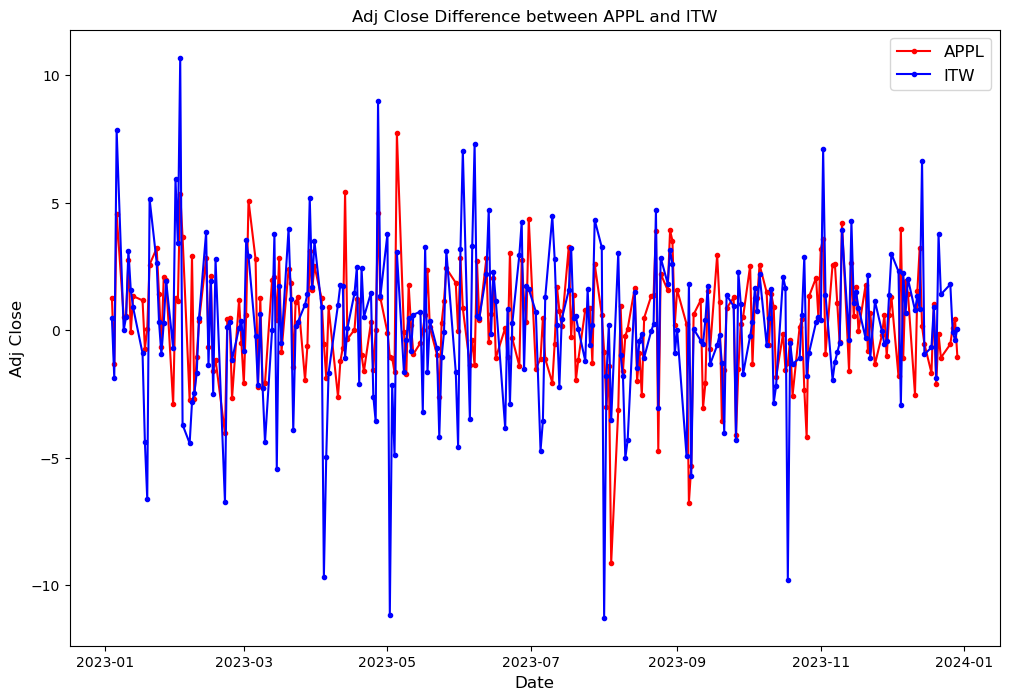

In [22]:
# Plot APPL and ITW
# Plot Adj Close
# Plot the main line with markers
plt.figure(figsize=(12,8))
plt.plot(data['Adj Close'].diff(),'.-',color='red',label='APPL')
plt.plot(data_ITW['Adj Close'].diff(),'.-',color='blue',label='ITW')

# Set labels
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('Adj Close Difference between APPL and ITW')

plt.legend(fontsize=12)
plt.show()

## Granger Causality

In [23]:
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests

In [24]:
df_GC = data.copy()
df_GC['ITW Adj Close'] = data_ITW['Adj Close']
df_GC

,Open,High,Low,Close,Adj Close,Volume,ITW Adj Close
Date,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,214.357849
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600,214.844330
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998444,80962700,212.956802
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,220.808411
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800,220.818161
...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,259.145569
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300,260.946381
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,260.886993


In [25]:
#res = grangercausalitytests([data['Adj Close'],data_ITW['Adj Close']],maxlag=15)

#df_GC = data['Adj Close'].copy()

res = grangercausalitytests(df_GC[['Adj Close', 'ITW Adj Close']], maxlag=15)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5158  , p=0.4733  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.5221  , p=0.4700  , df=1
likelihood ratio test: chi2=0.5215  , p=0.4702  , df=1
parameter F test:         F=0.5158  , p=0.4733  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3170  , p=0.2699  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=2.6881  , p=0.2608  , df=2
likelihood ratio test: chi2=2.6737  , p=0.2627  , df=2
parameter F test:         F=1.3170  , p=0.2699  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9183  , p=0.1272  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=5.9227  , p=0.1154  , df=3
likelihood ratio test: chi2=5.8528  , p=0.1190  , df=3
parameter F test:         F=1.9183  , p=0.1272  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4416  , p=0.0093  

In [26]:
data[['Adj Close', 'Open']]

,Adj Close,Open
Date,,
2023-01-03,124.048042,130.279999
2023-01-04,125.327507,126.889999
2023-01-05,123.998444,127.129997
2023-01-06,128.560867,126.010002
2023-01-09,129.086533,130.470001
...,...,...
2023-12-22,193.091385,195.179993
2023-12-26,192.542816,193.610001
2023-12-27,192.642548,192.490005


In [27]:
[data['Adj Close'], data_ITW['Adj Close']]

[Date
 2023-01-03    124.048042
 2023-01-04    125.327507
 2023-01-05    123.998444
 2023-01-06    128.560867
 2023-01-09    129.086533
                  ...    
 2023-12-22    193.091385
 2023-12-26    192.542816
 2023-12-27    192.642548
 2023-12-28    193.071426
 2023-12-29    192.024185
 Name: Adj Close, Length: 250, dtype: float64,
 Date
 2023-01-03    214.357849
 2023-01-04    214.844330
 2023-01-05    212.956802
 2023-01-06    220.808411
 2023-01-09    220.818161
                  ...    
 2023-12-22    259.145569
 2023-12-26    260.946381
 2023-12-27    260.886993
 2023-12-28    260.499023
 2023-12-29    260.558716
 Name: Adj Close, Length: 250, dtype: float64]